### Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [8]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
print("Check for different types of Values in Features")
print("Gender - no of unique values = {0} || unique values = {1}".format(df['gender'].nunique(), df['gender'].unique()))
print('------------')
print("race_ethnicity - no of unique values = {0} || unique values = {1}".format(df['race_ethnicity'].nunique(), df['race_ethnicity'].unique()))
print('------------')
print("parental_level_of_education - no of unique values = {0} || unique values = {1}".format(df['parental_level_of_education'].nunique(), df['parental_level_of_education'].unique()))
print('------------')
print("lunch - no of unique values = {0} || unique values = {1}".format(df['lunch'].nunique(), df['lunch'].unique()))
print('------------')
print("test_preparation_course - no of unique values = {0} || unique values = {1}".format(df['test_preparation_course'].nunique(), df['test_preparation_course'].unique()))


Check for different types of Values in Features
Gender - no of unique values = 2 || unique values = ['female' 'male']
------------
race_ethnicity - no of unique values = 5 || unique values = ['group B' 'group C' 'group A' 'group D' 'group E']
------------
parental_level_of_education - no of unique values = 6 || unique values = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------
lunch - no of unique values = 2 || unique values = ['standard' 'free/reduced']
------------
test_preparation_course - no of unique values = 2 || unique values = ['none' 'completed']


In [34]:
## define numerical and categorical column
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print("No of numerical_features={0} || numerical features = {1}".format(len(numerical_features), numerical_features))
print("No of categorical_features={0} || categorical_features = {1}".format(len(categorical_features), categorical_features))

No of numerical_features=3 || numerical features = ['math_score', 'reading_score', 'writing_score']
No of categorical_features=5 || categorical_features = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [35]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

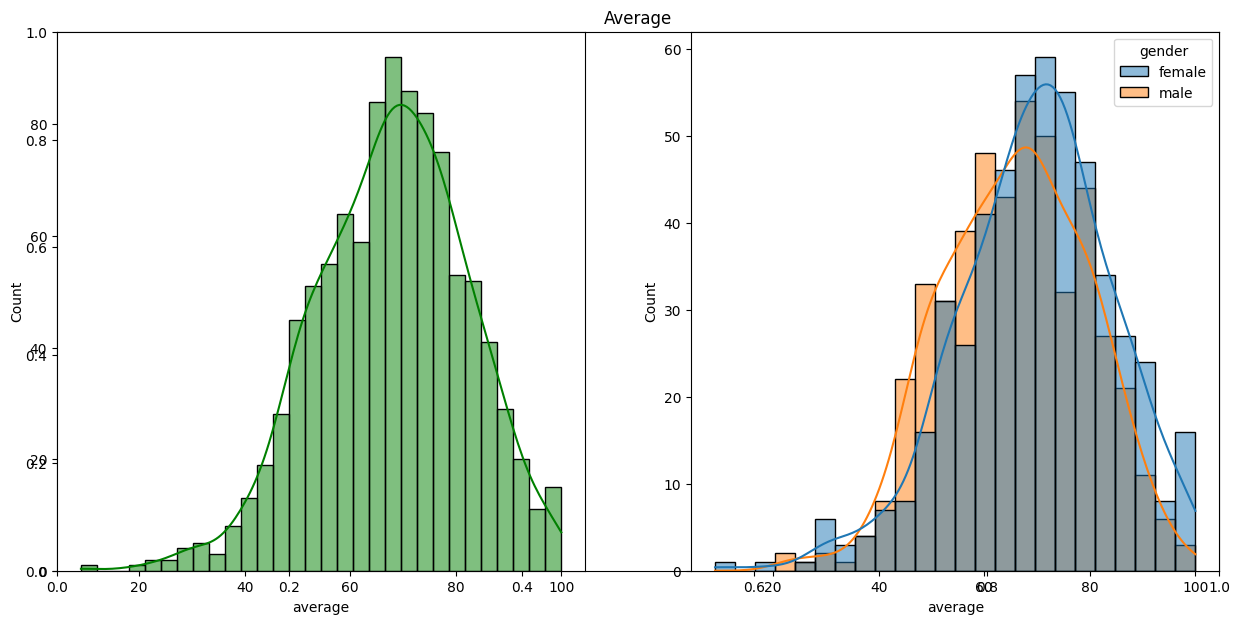

In [50]:
## Average

plt.figure(figsize=(15,7))
plt.title("Average")
plt.subplot(121)
sns.histplot(data=df,x='average', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

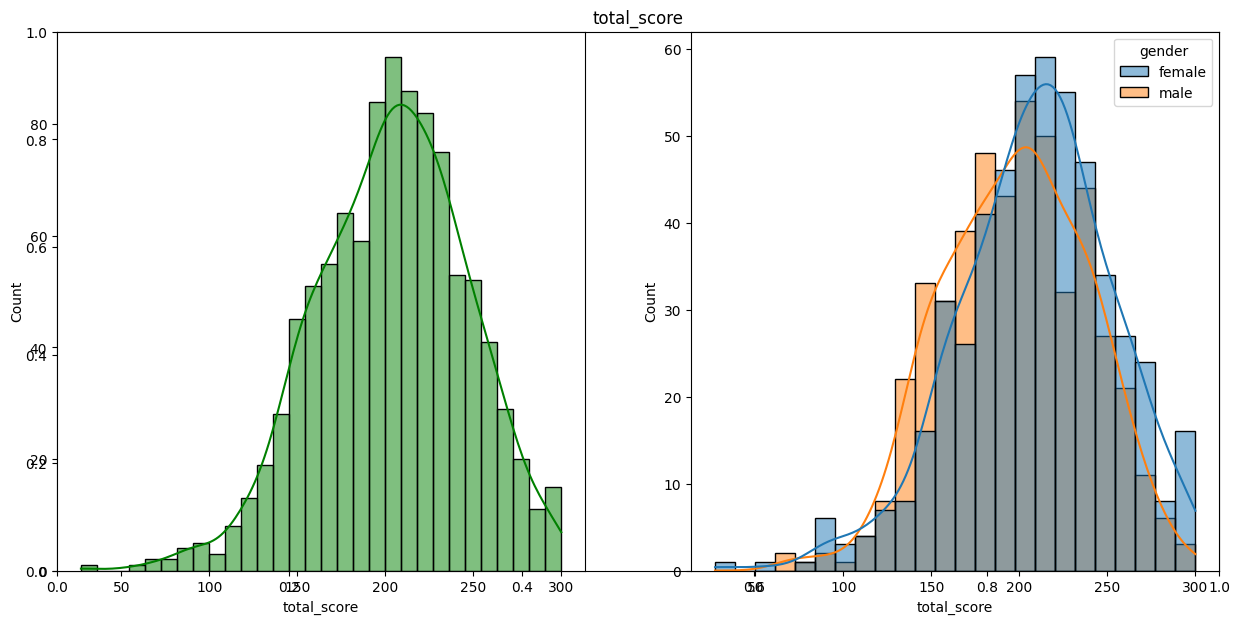

In [52]:
## total_score

plt.figure(figsize=(15,7))
plt.title("total_score")
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

<Axes: xlabel='average', ylabel='Count'>

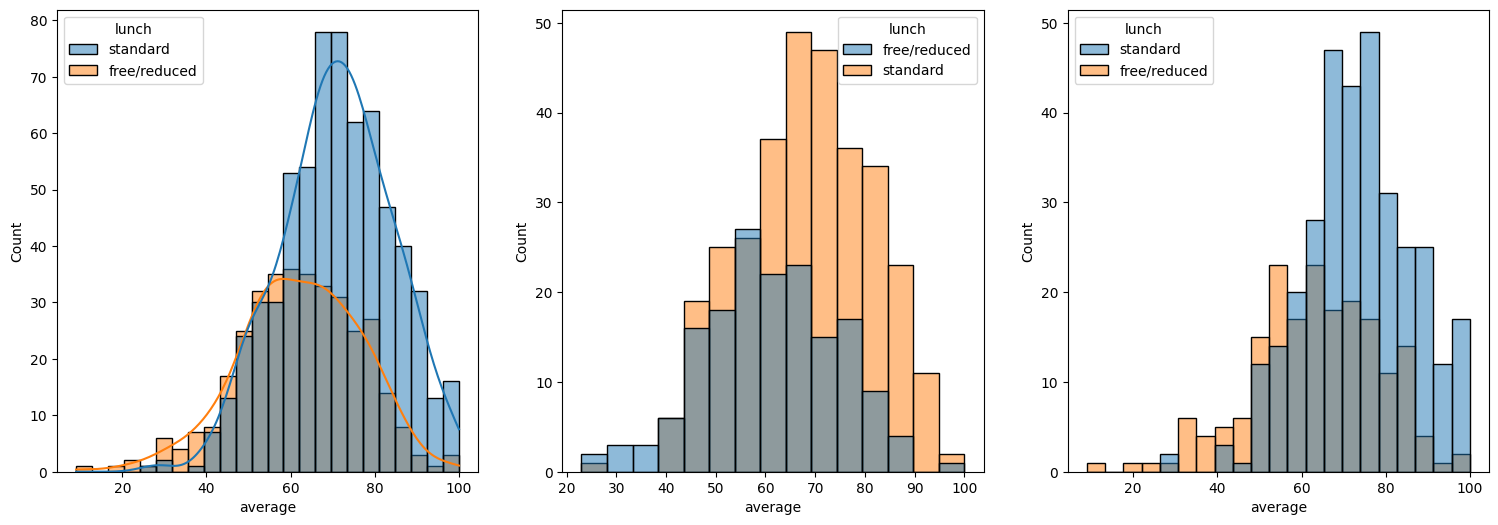

In [59]:
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average', hue='lunch', kde= True)
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']== 'female'], x='average', hue='lunch')

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

<Axes: xlabel='total_score', ylabel='Count'>

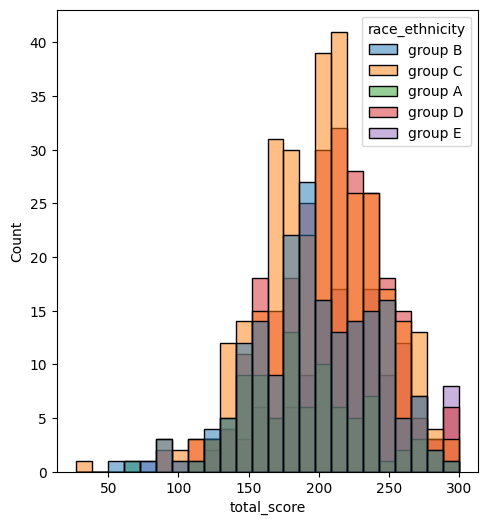

In [63]:
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='total_score', hue='race_ethnicity')

#####  Insights
- GroupB perform well in exams